# Learning
 1. It is a time series data, but is the trend in Semana vs. Demanda_uni_equil clear? A closer study per group and per ids are required.
 2. The data are clutered (Agencia_ID vs. Producto_ID). However, what do these IDs mean? Can other tables (town_state.csv, producto_tabla.csv, cliente_tabla.csv)
 3. Trends of log(Demanda_uni_equil), log(Canal_ID), and Ruta_SAK are observed in Agencia_ID vs. Producto_ID domain.
 4. It worth to look at each cluster seperately in EDA_002 or maybe EDA_003.
 5. n of observation is much greater than m of features, considering creating more features using information in Town_state.csv, Cliente_tabla.csv, Producto tables.
 6. Outliers of Demanda_uni_equil exist and should be studied.
# # ---------------------------------------------------------------------------------------------------
# Load tables in dataframes and pre-process them for exploratory analysis

In [58]:
# import modules
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn as sns
import math
%matplotlib inline

# #----------------------------------------------------------------------------------------------------
# Load 1/500 fraction of train.csv

In [12]:
# load training data
f = "./input/train.csv"
# read every 500th row
n = 500
# Count the lines or use on upper bound
num_lines = sum(1 for l in open(f))
print(num_lines)
# generate row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x %n != 0]
train = pd.read_csv(f,skiprows=skip_idx,
                   dtype = {'Semana':'int32',
                            'Agencia_ID':'int32',
                            'Canal_ID':'int32',
                            'Ruta_SAK':'int32',
                            'Cliente_ID':'int32',
                            'Producto_ID':'int32',
                            'Venta_uni_hoy':'int32',
                            'Venta_hoy':'float32',
                            'Dev_uni_proxima':'int32',
                            'Dev_proxima':'float32',
                            'Demanda_uni_equil':'int32'})
# drop unnecessary features
train = train.drop(['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima'], axis=1)

74180465


# File head and description

In [13]:
# show table heads
print(train.shape)
train

(148360, 7)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil
0,3,1110,7,3301,4603047,1220,5
1,3,1110,7,3303,1453543,4280,6
2,3,1110,7,3305,817203,47336,18
3,3,1110,7,3306,1546504,34053,7
4,3,1110,7,3307,1631915,3894,6
5,3,1110,7,3309,124805,30214,1
6,3,1110,7,3310,90301,32802,75
7,3,1110,7,3311,4660856,37057,3
8,3,1110,7,3313,4289409,1146,16
9,3,1110,7,3315,817236,35144,14


# Basic statistics of the variables

In [14]:
# summary of the data
train.describe()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Demanda_uni_equil
count,148360.000000,148360.000000,148360.000000,148360.000000,148360.000000,148360.000000,148360.000000
mean,5.950020,2536.429354,1.383655,2114.348160,1808268.056963,20832.187166,7.293833
std,2.013175,4074.943751,1.464015,1487.309192,1847694.462495,18653.047537,25.433539
min,3.000000,1110.000000,1.000000,1.000000,26.000000,72.000000,0.000000
25%,4.000000,1312.000000,1.000000,1161.000000,357852.750000,1242.000000,2.000000
50%,6.000000,1613.000000,1.000000,1286.000000,1198511.500000,30548.000000,3.000000
75%,8.000000,2036.000000,1.000000,2802.000000,2373497.000000,37361.000000,6.000000
max,9.000000,25759.000000,11.000000,9921.000000,11693264.000000,49992.000000,3904.000000


# Crossplotting features of train.csv

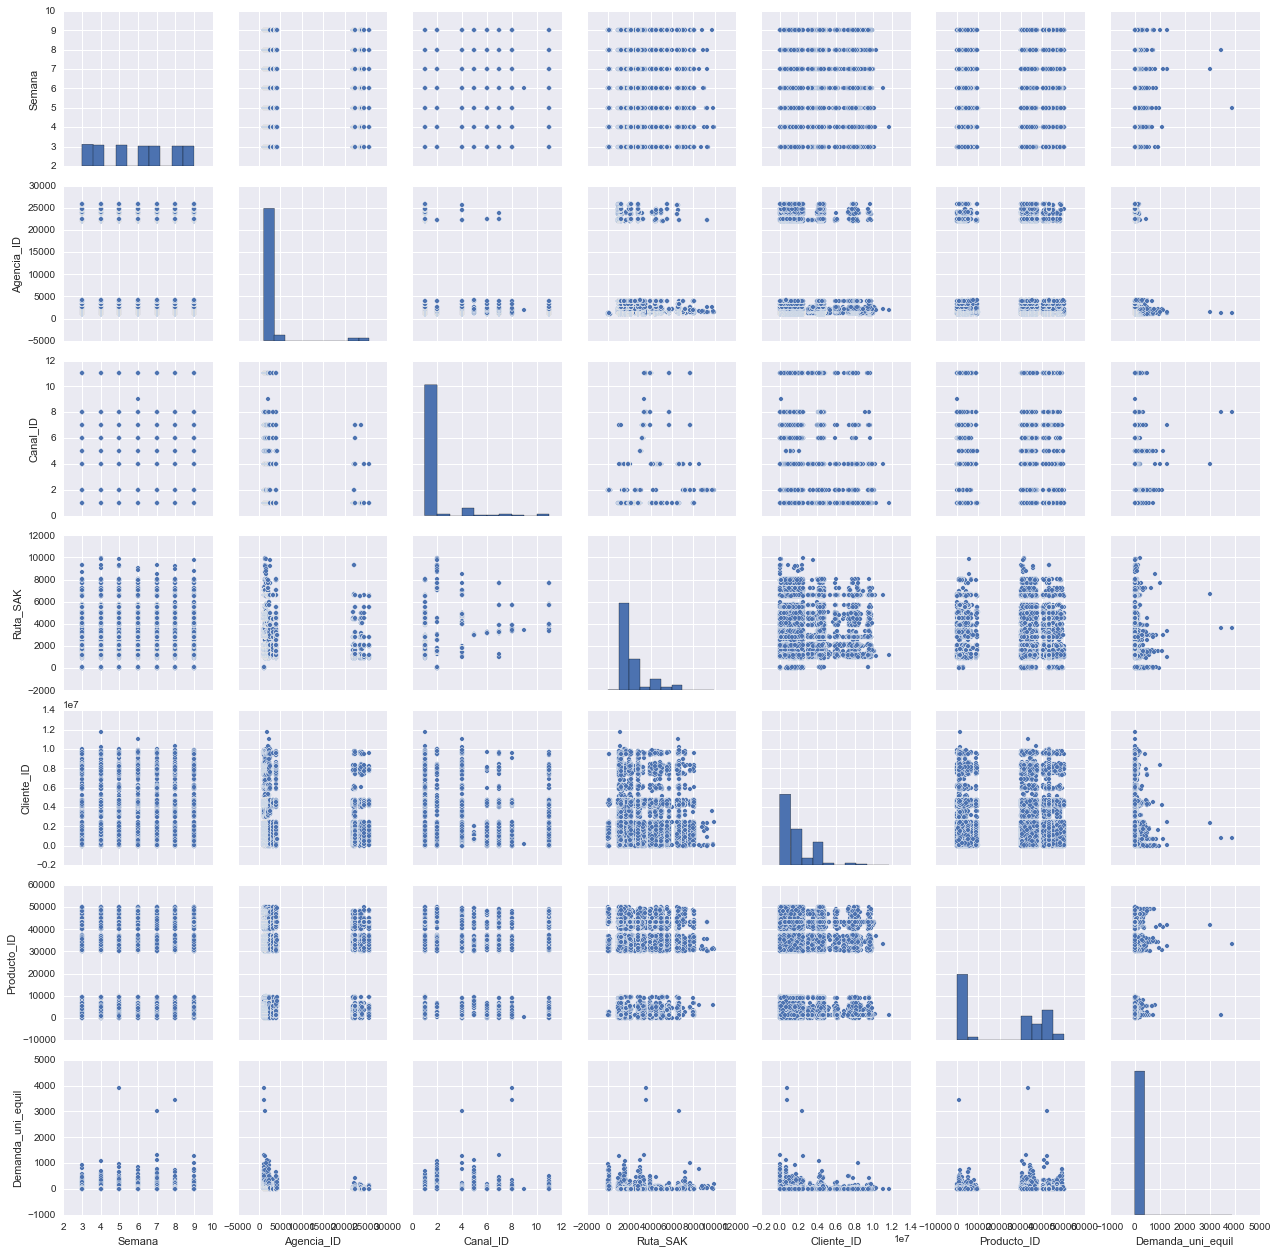

In [34]:
# pairwise analysis
sns.pairplot(train);

# clusters colored with log(train['Demanda_uni_equil'])

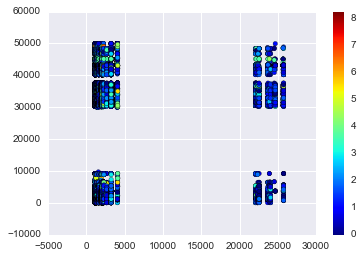

In [76]:
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = np.log(train['Demanda_uni_equil']), cmap='jet')
plt.colorbar(points)

# clusters colored with log(train['Canal_ID'])

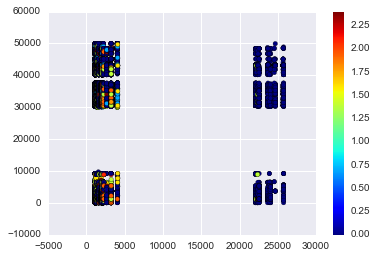

In [74]:
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = np.log(train['Canal_ID']), cmap='jet')
plt.colorbar(points)

# clusters colored with train['Ruta_SAK']

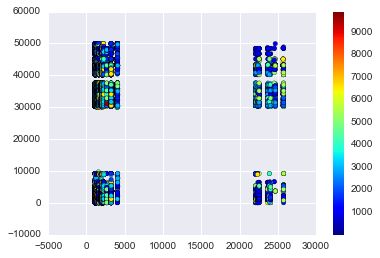

In [69]:
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = (train['Ruta_SAK']), cmap='jet')
plt.colorbar(points)

# clusters colored with train['Cliente_ID']

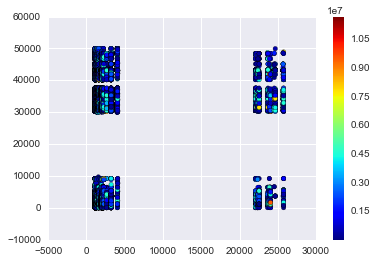

In [72]:
points=plt.scatter(x='Agencia_ID',y='Producto_ID',data=train, c = (train['Cliente_ID']), cmap='jet')
plt.colorbar(points)

# #-------------------------------------------------------------------------------------
# Load and explore 1/500 test.csv
Learning:
Similar clusters are observed as that in train.csv

In [28]:
# load test data
f = "./input/test.csv"
# read every 1000th row
n = 500
# Count the lines or use on upper bound
num_lines = sum(1 for l in open(f))
print(num_lines)
# generate row indices to skip - make sure 0 is not included to keep the header!
skip_idx = [x for x in range(1, num_lines) if x %n != 0]
test = pd.read_csv(f,skiprows=skip_idx,
                   dtype = {'id':'int32',
                            'Semana':'int32',
                            'Agencia_ID':'int32',
                            'Canal_ID':'int32',
                            'Ruta_SAK':'int32',
                            'Cliente_ID':'int32',
                            'Producto_ID':'int32'})

6999252


# File head and descrtion of the table

In [30]:
print(test.shape)
test

(13998, 7)


,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,499,11,1478,4,4907,1413718,43251
1,999,10,1310,1,2008,677271,43066
2,1499,11,2034,1,4489,2132553,32302
3,1999,10,1912,1,1106,1326398,41843
4,2499,11,1331,1,2005,2232334,37495
5,2999,10,22362,1,2812,4236234,37058
6,3499,11,2211,1,2906,497832,37361
7,3999,10,1126,1,1206,1301467,35651
8,4499,10,2263,1,1026,1145899,2233
9,4999,10,1116,1,1064,47029,1146


In [28]:
# describe data
test.describe()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,3499999.000000,10.499071,2484.146021,1.383626,2150.561937,1778994.359480,22307.431633
std,2020581.599441,0.500035,3978.643259,1.442177,1517.197489,1835358.919525,18683.806427
min,999.000000,10.000000,1110.000000,1.000000,3.000000,906.000000,72.000000
25%,1750499.000000,10.000000,1311.000000,1.000000,1159.000000,348659.000000,1250.000000
50%,3499999.000000,10.000000,1583.000000,1.000000,1407.000000,1153444.000000,31511.000000
75%,5249499.000000,11.000000,2032.000000,1.000000,2805.000000,2365716.000000,40930.000000
max,6998999.000000,11.000000,25759.000000,11.000000,9319.000000,9891984.000000,49973.000000


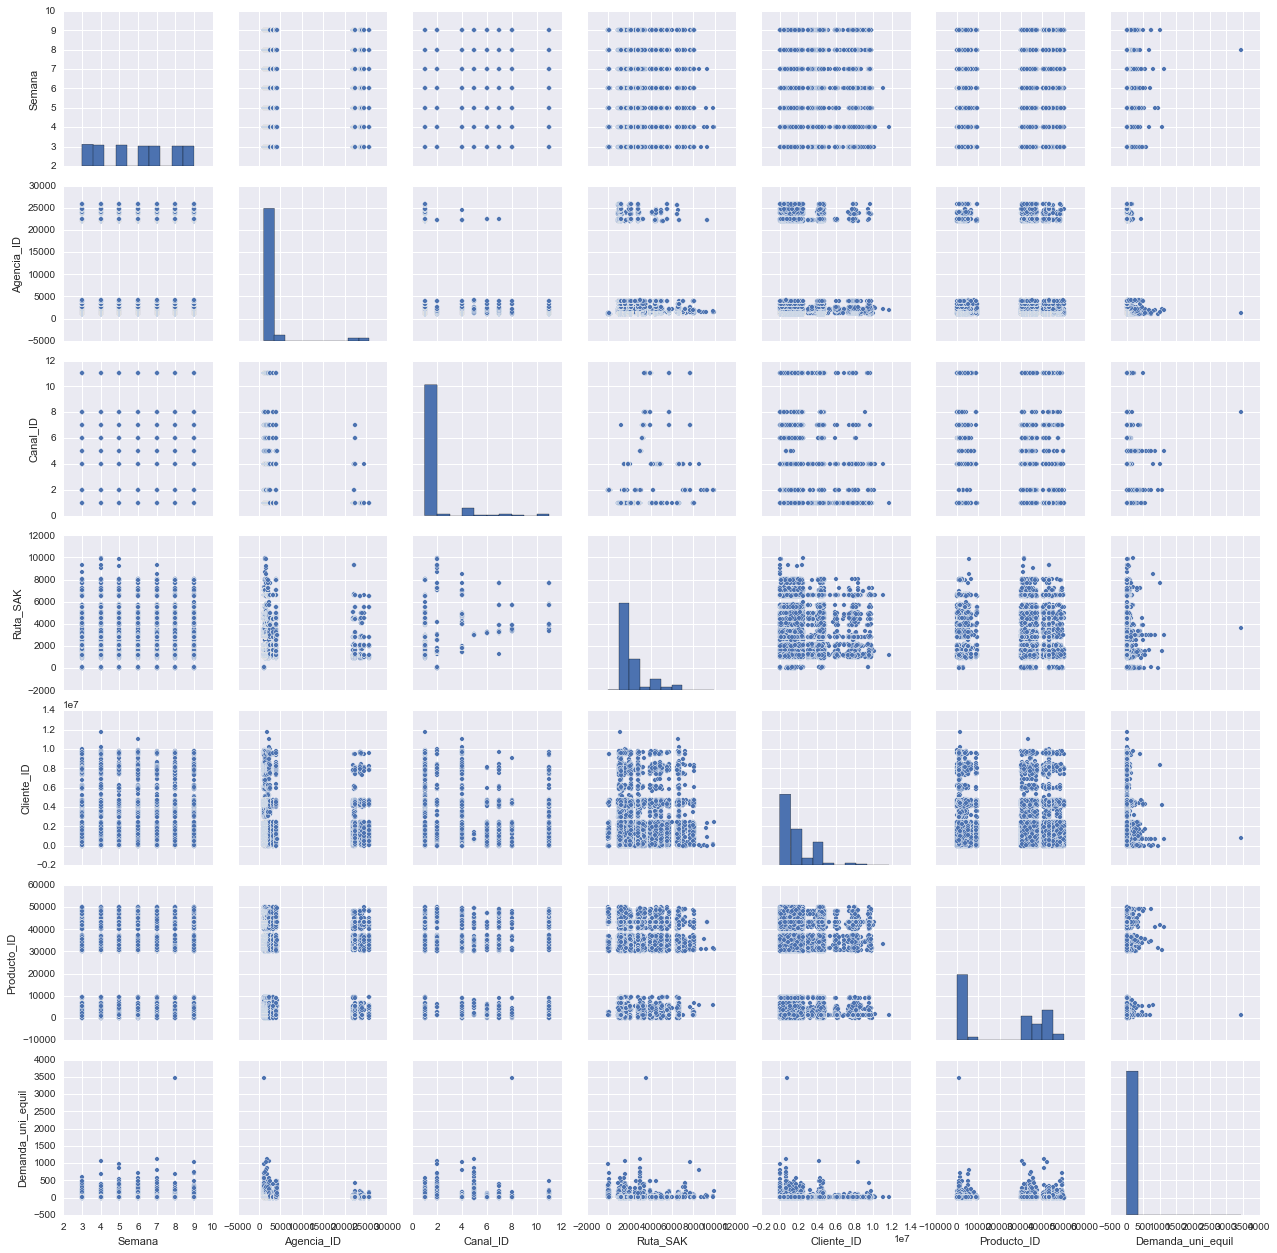

In [30]:
# pairwise analysis
sns.pairplot(train);

# #-----------------------------------------------------------------------------------
# Load the rest tables and explore
1. Clusters
1) Agencia_ID (0, 5000) and Producto_ID (0,10000)
2) Agencia_ID (20000,25000) and Producto_ID (0,10000)
3) Agencia_ID (0, 5000) and Producto_ID (30000,50000)
4) Agencia_ID (20000,25000) and Producto_ID (30000,50000)
2. Check the tails of Cliente_table ==> we may need to decompose the product names to cluster products, because new products will apppear in test.csv

In [31]:
   
# load town_state, producto_tabla, cliente_tabla tables
town_state = pd.read_csv("./input/town_state.csv")
producto_tabla = pd.read_csv("./input/producto_tabla.csv")
cliente_tabla = pd.read_csv("./input/cliente_tabla.csv")

# town_state.csv

In [32]:
print(town_state.shape)
town_state

(790, 3)


,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."
5,1116,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
6,1117,2001 AG. ATIZAPAN,ESTADO DE MÉXICO
7,1118,2007 AG. LA VILLA,"MÉXICO, D.F."
8,1119,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO
9,1120,2018 AG. TEPALCATES 2,"MÉXICO, D.F."


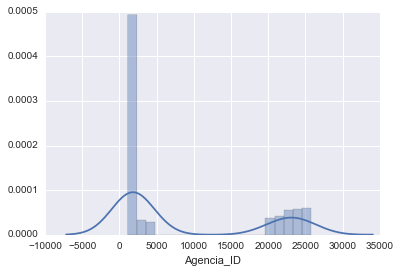

In [120]:
# pairwise data analysis
sns.distplot(town_state['Agencia_ID'],bins=20);

In [79]:
# list all agencia_ids
town_state.groupby('Agencia_ID').count()

,Town,State
Agencia_ID,,
1110,1,1
1111,1,1
1112,1,1
1113,1,1
1114,1,1
1116,1,1
1117,1,1
1118,1,1
1119,1,1


In [80]:
# list all states
town_state.groupby('State').count()

,Agencia_ID,Town
State,,
AGUASCALIENTES,7,7
BAJA CALIFORNIA NORTE,32,32
BAJA CALIFORNIA SUR,17,17
CAMPECHE,12,12
CHIAPAS,16,16
CHIHUAHUA,25,25
COAHUILA,29,29
COLIMA,10,10
DURANGO,11,11


In [81]:
# list all towns
town_state.groupby('Town').count()

,Agencia_ID,State
Town,,
2001 AG. ATIZAPAN,5,5
2002 AG. AZCAPOTZALCO,4,4
2003 AG. COACALCO,5,5
2004 AG. CUAUTITLAN,4,4
2007 AG. LA VILLA,3,3
2008 AG. LAGO FILT,4,4
2010 AG. LOS REYES,3,3
2011 AG. SAN ANTONIO,7,7
2013 AG. MEGA NAUCALPAN,8,8


# producto_tabla.csv

In [108]:
print(producto_tabla.shape)
producto_tabla.head()

(2592, 2)


,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


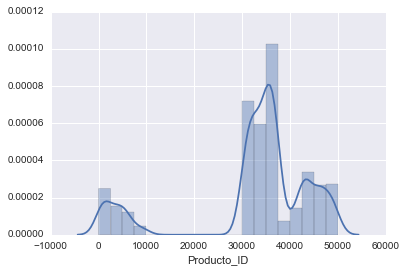

In [116]:
# pairwise data analysis without 'NO IDENTIFICADO 0'
sns.distplot(producto_tabla[producto_tabla[:]['NombreProducto']!='NO IDENTIFICADO 0'][:]['Producto_ID'],bins = 20);

In [77]:
# list all products
producto_tabla.groupby('NombreProducto').count()

,Producto_ID
NombreProducto,
100pct Whole Wheat 680g MTA ORO 43111,1
100pct Whole Wheat 680g ORO 9753,1
12 Tarima MiniMilk Kitty Nav 110g GBI 37157,1
12Granos Multigra TwinPack 1360g MTA ORO 43364,1
12Granos Multigra TwinPack 1360g TAB ORO 48227,1
12Tarima Mini Milk Kitty SnVal 110g GBI 37373,1
7 Granos 680g MTA ORO 43160,1
7 Granos 680g ORO 714,1
7 Granos 680g TAB ORO 48228,1


In [78]:
# list all products
producto_tabla.groupby('Producto_ID').count()

,NombreProducto
Producto_ID,
0,1
9,1
41,1
53,1
72,1
73,1
98,1
99,1
100,1


# cliente_tabla.csv

In [115]:
print(cliente_tabla.shape)
cliente_tabla.head()

(935362, 2)


,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


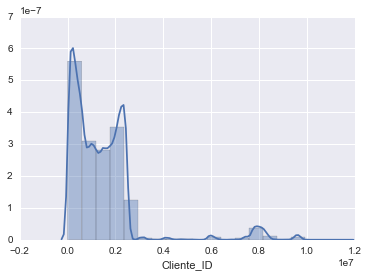

In [40]:
# pairwise data analysis without 'NO IDENTIFICADO'
sns.distplot(cliente_tabla.ix[(cliente_tabla['NombreCliente']!='NO IDENTIFICADO')& (cliente_tabla['NombreCliente']!='SIN NOMBRE'),'Cliente_ID']
             ,bins=20);